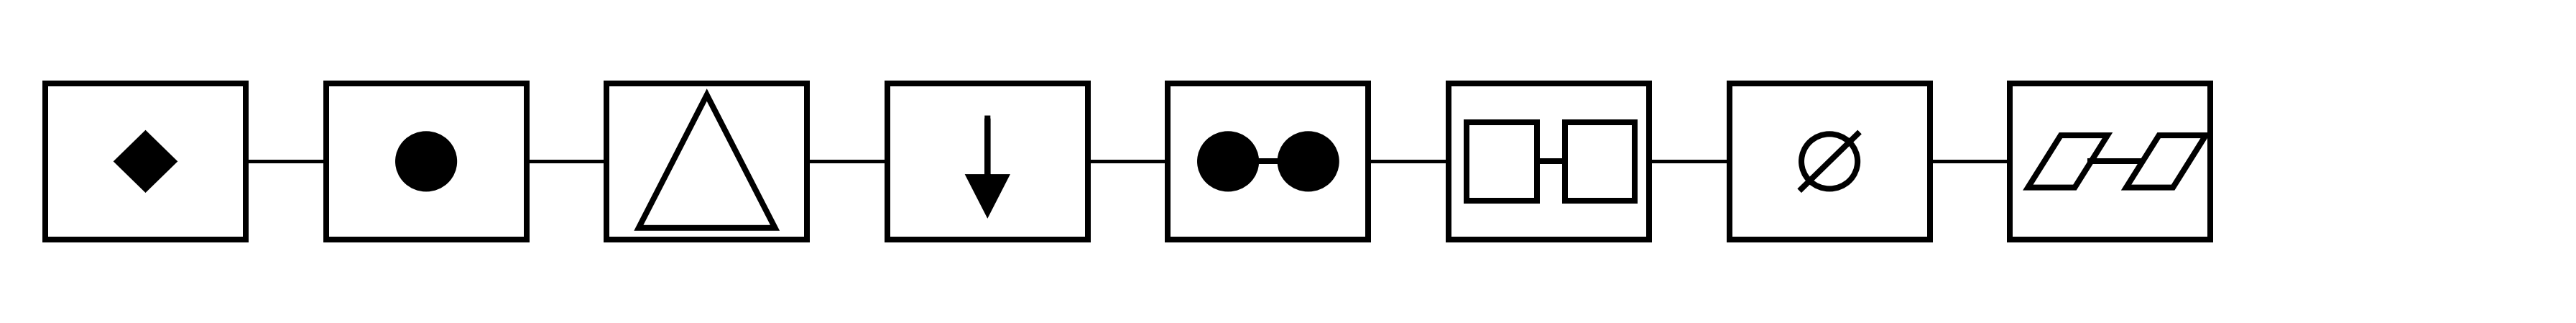

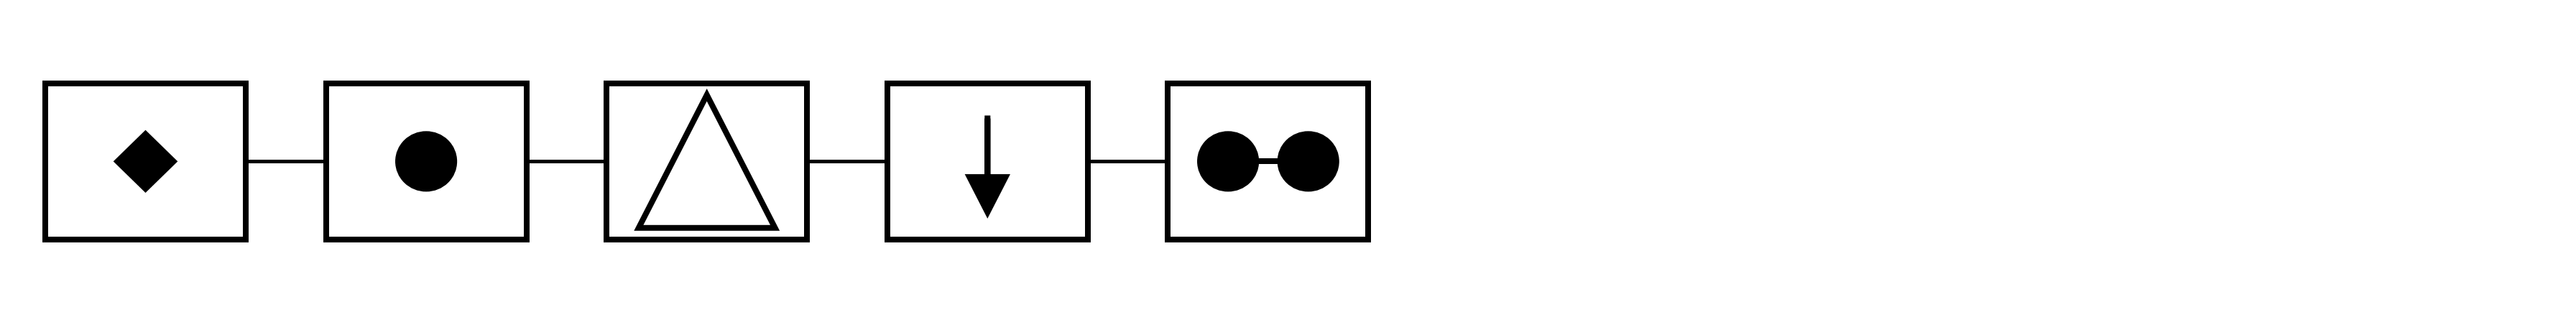

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


class List:
    def __init__(self, shapes, top_width=5, bottom_width=7, height=4):
        self.shapes = shapes
        self.top_width = top_width
        self.bottom_width = bottom_width
        self.height = height
        self.facecolor = 'None'

        max_shapes = max(len(shapes), 8)  # Ensure a minimum of 8 shapes
        # Calculate the figure width based on the maximum number of shapes
        fig_width = max_shapes * (bottom_width + 1)
        fig_height = 2 * height

        self.fig, self.ax = plt.subplots(figsize=(fig_width, fig_height))
        self.ax.axis([0, fig_width, -height, height])
        plt.axis("off")

        self.create_background()
        self.create()



    def rectangle_list(self, center_x, center_y, shape, top_label, bottom_label):
        half_top = self.top_width / 2
        half_bottom = self.bottom_width / 2
       # phi = 1.61803398875  # Golden ratio
        rect = patches.Rectangle(
            (center_x - half_top, center_y - self.height / 2),
# Calculate the width and height based on the golden ratio
            width=self.top_width,
           # height=self.top_width / phi,
             height=self.height,
            facecolor=self.facecolor,
            edgecolor='black',
            linewidth=8
        )
        self.ax.add_patch(rect)

        if isinstance(shape, str) and len(shape) == 1:
   
             circle = patches.Circle((center_x, center_y), radius=0.7, facecolor='black', edgecolor='black', linewidth=8)
             self.ax.add_patch(circle)

        
        elif type(shape) == str:
            circle1 = patches.Circle((center_x - 1, center_y), radius=0.7, facecolor='black', edgecolor='black',linewidth=8)
            circle2 = patches.Circle((center_x + 1, center_y), radius=0.7, facecolor='black', edgecolor='black',linewidth=8)
            self.ax.add_patch(circle1)
            self.ax.add_patch(circle2)
            self.ax.plot([center_x - 0.3, center_x + 0.3], [center_y, center_y], color='black', linewidth=8)
            
        elif type(shape) == int or type(shape)==float or type(shape)==complex:
            vertical_distance = 0.7  # previously 1
            horizontal_distance = 0.7  # previously 1

            rhombus = patches.Polygon(
              [(center_x, center_y + vertical_distance), 
              (center_x - horizontal_distance, center_y), 
              (center_x, center_y - vertical_distance), 
              (center_x + horizontal_distance, center_y)],
               facecolor='black',
               edgecolor='black',
              linewidth=8)
                
            self.ax.add_patch(rhombus)

        
        elif type(shape) == set:
            vertical_distance = 1.7  # previously 1
            horizontal_distance = 1.7  # previously 1

            triangle = patches.Polygon(
               [(center_x, center_y + vertical_distance), 
                (center_x - horizontal_distance, center_y - vertical_distance), 
                (center_x + horizontal_distance, center_y - vertical_distance)],
                facecolor='None', edgecolor='black', linewidth=8)
            self.ax.add_patch(triangle)
        
        elif shape == True:
            line_length=1.5
            arrow = patches.FancyArrow(center_x, center_y-1.1, 0, line_length, head_width=0.9, head_length=0.9, fc='black', ec='black', linewidth=8)
            self.ax.add_patch(arrow)
        elif shape == False:
            line_length=1.5
            arrow = patches.FancyArrow(center_x, center_y+1.1, 0, -line_length, head_width=0.9, head_length=0.9, fc='black', ec='black', linewidth=8)
            self.ax.add_patch(arrow)
     
        elif shape is None:
            circle_None = patches.Circle((center_x, center_y), radius=0.7, facecolor='None', edgecolor='black', linewidth=8)
            self.ax.add_patch(circle_None)

    # Draw a diagonal line through the circle
    # Adjust these values to correctly position the line based on the circle's position and radius
            line_start_x = center_x - 0.7
            line_start_y = center_y - 0.7
            line_end_x = center_x + 0.7
            line_end_y = center_y + 0.7
            self.ax.plot([line_start_x, line_end_x], [line_start_y, line_end_y], color='black', linewidth=8)

            
        elif type(shape) == list:
            rect1 = patches.Rectangle(
                (center_x - half_bottom / 2-0.3, center_y - self.height / 4),
                width=half_bottom / 2,
                height=self.height / 2,
                facecolor='None',
                edgecolor='black',
                linewidth=8
            )
            rect2 = patches.Rectangle(
                (center_x + half_bottom / 7-0.1, center_y - self.height / 4),
                width=half_bottom / 2,
                height=self.height / 2,
                facecolor='None',
                edgecolor='black',
                linewidth=8
            )
            self.ax.add_patch(rect1)
            self.ax.add_patch(rect2)
            # Add connection line between rectangles
            self.ax.plot([center_x - half_bottom / 2+1.5, center_x + half_bottom / 7-0.1], [center_y, center_y], color='black', linewidth=8)
            
        elif type(shape) == tuple: 
            para_width = half_bottom / 3
            para_height = self.height / 3
            skew_factor = para_width * 0.7  # Adjust to skew the parallelogram

    # Calculate positions for the parallelograms
            para1_points = [
               (center_x - half_bottom / 2 - 0.3, center_y - para_height / 2),  # Bottom left
               (center_x - half_bottom / 2 + para_width - 0.3, center_y - para_height / 2),  # Bottom right
               (center_x - half_bottom / 2 + para_width - 0.3 + skew_factor, center_y + para_height / 2),  # Top right
               (center_x - half_bottom / 2 - 0.3 + skew_factor, center_y + para_height / 2)  # Top left
                    ]
            para2_points = [
               (center_x + half_bottom / 7 - 0.1, center_y - para_height / 2),  # Bottom left
               (center_x + half_bottom / 7 + para_width - 0.1, center_y - para_height / 2),  # Bottom right
               (center_x + half_bottom / 7 + para_width - 0.1 + skew_factor, center_y + para_height / 2),  # Top right
               (center_x + half_bottom / 7 - 0.1 + skew_factor, center_y + para_height / 2)  # Top left
                    ]

    # Create parallelograms
            para1 = patches.Polygon(para1_points, closed=True, facecolor='None', edgecolor='black', linewidth=8)
            para2 = patches.Polygon(para2_points, closed=True, facecolor='None', edgecolor='black', linewidth=8)
            self.ax.add_patch(para1)
            self.ax.add_patch(para2)

    # Add connection line between parallelograms
            self.ax.plot([center_x - half_bottom / 2 + 1.25, center_x + half_bottom / 7 + 0.2], [center_y, center_y], color='black', linewidth=8)


    def create_background(self):
        background_width = len(self.shapes) * (self.bottom_width + 0.1)
        background_height = 2 * self.height
        rectangle = patches.Rectangle(
            (0, -self.height),
            width=background_width,
            height=background_height,
            facecolor="None",
            edgecolor='None',
            linewidth=2
        )
        self.ax.add_patch(rectangle)

    def create(self):
        positions = [i * (self.bottom_width) for i in range(len(self.shapes))]
        centers = []

        for i, (shape, index) in enumerate(zip(self.shapes, range(len(self.shapes)))):
            center_x = positions[i] + self.bottom_width / 2
            center_y = 0
            top_label = index
            bottom_label = index - len(self.shapes)
            self.rectangle_list(center_x, center_y, shape, top_label, bottom_label)
            centers.append((center_x, center_y))

        # Add connection lines between rectangles
        for i in range(len(centers) - 1):
            x1, y1 = centers[i]
            x2, y2 = centers[i + 1]
            self.ax.plot([x1 + self.top_width / 2, x2 - self.top_width / 2], [y1, y2], color='black', linewidth=5)

        plt.show()

shapes1 = [1, "A", set(),False,"fffgf", [1,2,3],None,(0,9)]
shapes2 = [1, "A", set(),False,"fffgf"]
List(shapes1)
List(shapes2)
